<a href="https://colab.research.google.com/github/Maria-Costa/Arduino-Fisica/blob/main/Arduino_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd  # para ler o excel e mexer com tabelas
import numpy as np   # para fazer cálculos como média, ajuste linear e tudo mais
import matplotlib.pyplot as plt  # para gerar gráficos

In [5]:
#import da planilha do excel que foi utilizada durante as aulas para trabalhar com os dados do Tracker e gerar os gráficos
from google.colab import files
uploaded = files.upload()

Saving Arduino2 (2).xlsx to Arduino2 (2).xlsx


In [6]:
# ler a planilha chamada "Planilha1", ignorando as 2 primeiras linhas
df = pd.read_excel("Arduino2 (2).xlsx", sheet_name="Planilha1", skiprows=2)

# para renomear as colunas para os nomes que eu quero
df = df.iloc[:, [1, 2, 3, 4]]
df.columns = ['tempo', 'posicao', 'velocidade', 'aceleracao']

# garante os valores numéricos e remove linhas em branco
df = df.apply(pd.to_numeric, errors='coerce').dropna(subset=['tempo', 'posicao'])

#Gráficos do Modo ⊗

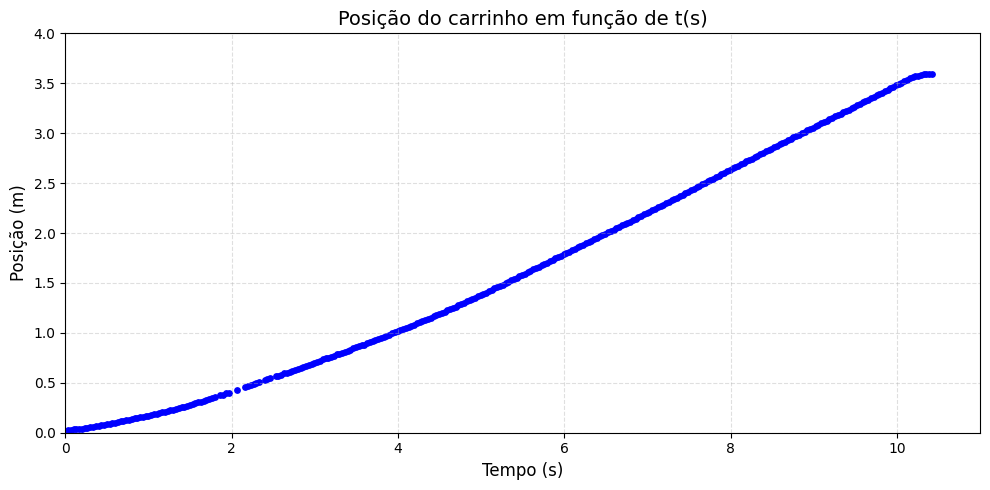

Máximo de tempo: 10.42s
Máxima posição: 3.60m


In [7]:
# gráfico Posição x Tempo
plt.figure(figsize=(10, 5))
plt.scatter(df['tempo'], df['posicao'], color='blue', s=15)

plt.title('Posição do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Posição (m)', fontsize=12)
plt.xlim(0, 11)
plt.ylim(0, 4)
plt.grid(True, linestyle='--', alpha=0.4)

# para exportar pro relatório
plt.savefig("grafico_xt_V2.png", dpi=300)

plt.tight_layout()
plt.show()

# informação complementar sobre os dados
print(f"Máximo de tempo: {df['tempo'].max():.2f}s")
print(f"Máxima posição: {df['posicao'].max():.2f}m")

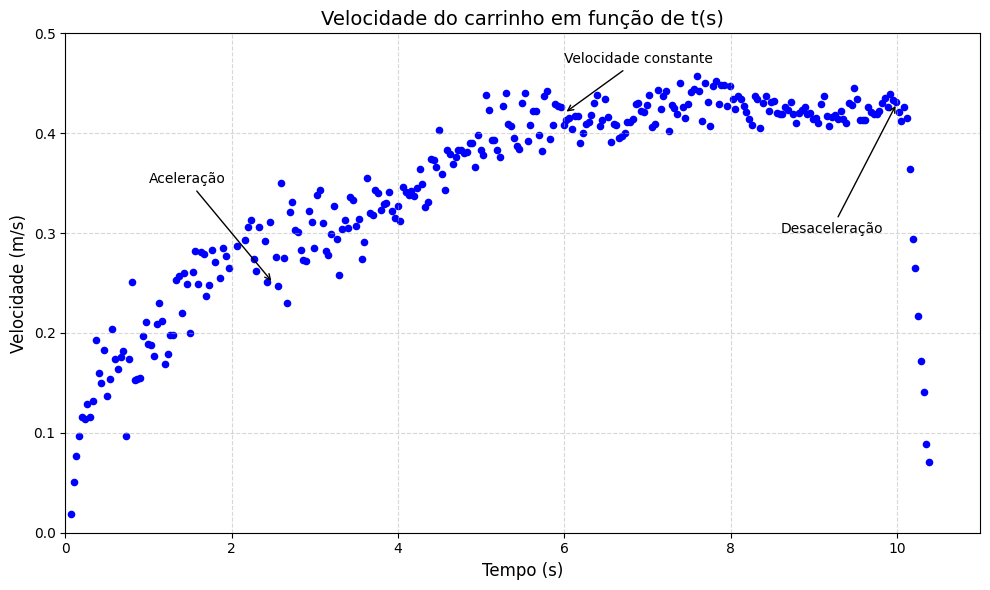

Velocidade máxima: 0.46 m/s


In [8]:
# gráfico Velocidade x Tempo
plt.figure(figsize=(10, 6))
plt.scatter(df['tempo'], df['velocidade'], color='blue', s=20)

plt.title('Velocidade do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade (m/s)', fontsize=12)
plt.xlim(0, 11)
plt.ylim(0, 0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# aceleração inicial
plt.annotate('Aceleração',
             xy=(2.5, 0.25),
             xytext=(1, 0.35),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# velocidade constante
plt.annotate('Velocidade constante',
             xy=(6, 0.42),
             xytext=(6, 0.47),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# desaceleraçaõ
plt.annotate('Desaceleração',
             xy=(10, 0.43),
             xytext=(8.6, 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# para exportar pro relatório
plt.savefig("grafico_vt_V2.png", dpi=300)

plt.tight_layout()
plt.show()

# informação complementar sobre os dados
print(f"Velocidade máxima: {df['velocidade'].max():.2f} m/s")

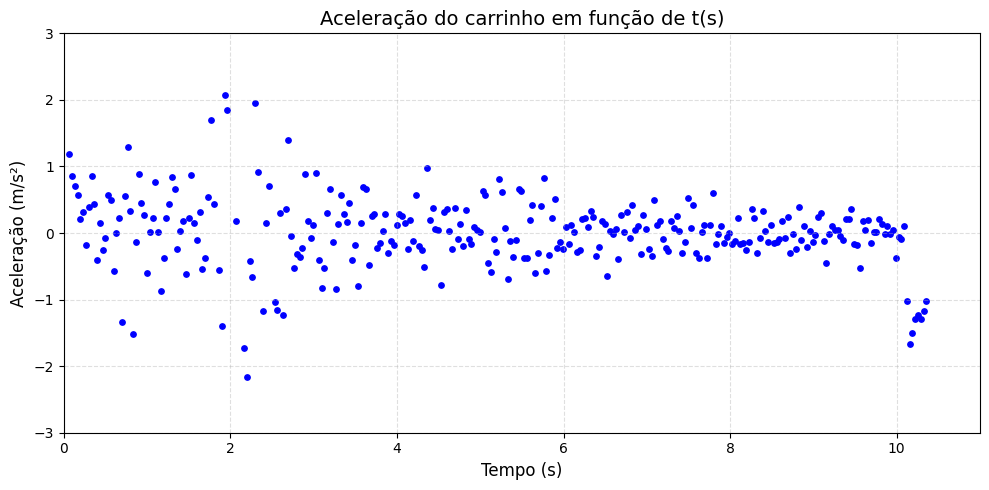

In [9]:
# gráfico Aceleração X Tempo
plt.figure(figsize=(10, 5))
plt.scatter(df['tempo'], df['aceleracao'], color='blue', s=15)


plt.title('Aceleração do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Aceleração (m/s²)', fontsize=12)
plt.xlim(0, 11)
plt.ylim(-3, 3)
plt.grid(True, linestyle='--', alpha=0.4)

# para exportar pro relatório
plt.savefig("grafico_at_V2.png", dpi=300)

plt.tight_layout()
plt.show()

In [10]:
# divisão dos trechos
t1 = df[(df['tempo'] >= 0) & (df['tempo'] <= 1.5)]     # aceleração inicial forte
t2 = df[(df['tempo'] > 1.5) & (df['tempo'] <= 5.8)]    # aceleração leve
t3 = df[(df['tempo'] > 5.8) & (df['tempo'] <= 9.8)]    # movimento uniforme
t4 = df[(df['tempo'] > 9.8)]                           # desaceleração

In [20]:
# função para ajustar a reta
def ajustar_reta(tempo, velocidade):
    coef = np.polyfit(tempo, velocidade, 1)
    return coef, np.poly1d(coef)

In [21]:
# aplicação dos ajustes em cada uma das retas
coef1, f1 = ajustar_reta(t1['tempo'], t1['velocidade'])
coef2, f2 = ajustar_reta(t2['tempo'], t2['velocidade'])
coef3, f3 = ajustar_reta(t3['tempo'], t3['velocidade'])
coef4, f4 = ajustar_reta(t4['tempo'], t4['velocidade'])

In [22]:
# para gerar o intervalo das retas
t1_range = np.linspace(t1['tempo'].min(), t1['tempo'].max(), 50)
t2_range = np.linspace(t2['tempo'].min(), t2['tempo'].max(), 50)
t3_range = np.linspace(t3['tempo'].min(), t3['tempo'].max(), 50)
t4_range = np.linspace(t4['tempo'].min(), t4['tempo'].max(), 50)
t4 = t4.dropna(subset=['tempo', 'velocidade'])

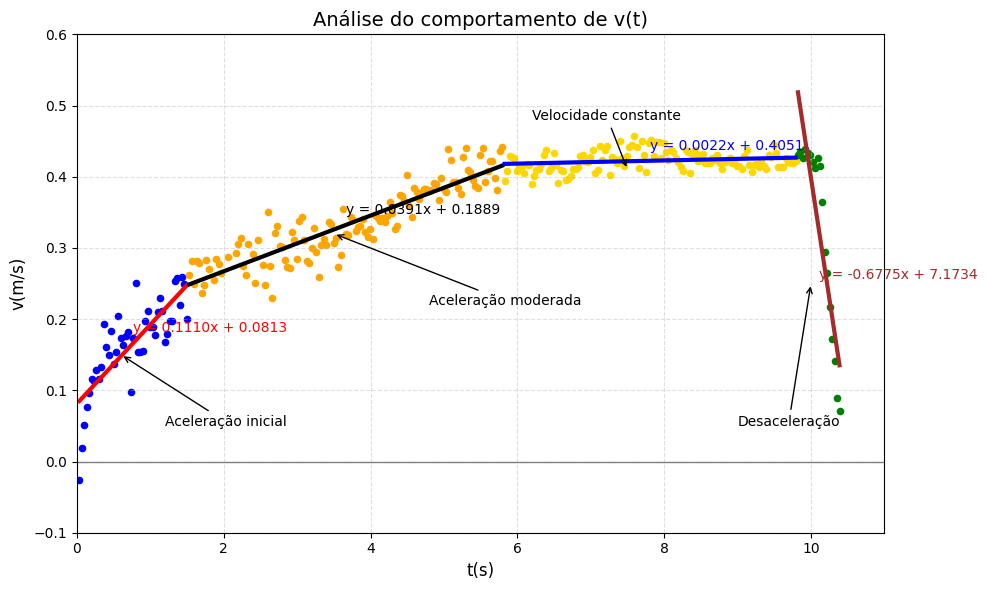

In [24]:
# separação dos diferentes movimentos observados
plt.figure(figsize=(10, 6))

# trecho 1 - aceleração inicial
plt.scatter(t1['tempo'], t1['velocidade'], color='blue', s=20)
plt.plot(t1_range, f1(t1_range), color='red', linewidth=3)
plt.text(t1_range.mean(), f1(t1_range.mean()) + 0.015,
         f"y = {coef1[0]:.4f}x + {coef1[1]:.4f}", fontsize=10, color='red')

# trecho 2 - aceleração moderada
plt.scatter(t2['tempo'], t2['velocidade'], color='orange', s=20)
plt.plot(t2_range, f2(t2_range), color='black', linewidth=3)
plt.text(t2_range.mean(), f2(t2_range.mean()) + 0.015,
         f"y = {coef2[0]:.4f}x + {coef2[1]:.4f}", fontsize=10, color='black')

# trecho 3 - velocidade constante
plt.scatter(t3['tempo'], t3['velocidade'], color='gold', s=20)
plt.plot(t3_range, f3(t3_range), color='blue', linewidth=3)
plt.text(t3_range.mean(), f3(t3_range.mean()) + 0.015,
         f"y = {coef3[0]:.4f}x + {coef3[1]:.4f}", fontsize=10, color='blue')

# trecho 4 - desaceleração
plt.scatter(t4['tempo'], t4['velocidade'], color='green', s=20)
plt.plot(t4_range, f4(t4_range), color='brown', linewidth=3)
plt.text(t4_range.mean(), f4(t4_range.mean()) - 0.07,
         f"y = {coef4[0]:.4f}x + {coef4[1]:.4f}", fontsize=10, color='brown')

# Anotações
plt.annotate('Aceleração inicial', xy=(0.6, 0.15), xytext=(1.2, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.annotate('Aceleração moderada', xy=(3.5, 0.32), xytext=(4.8, 0.22),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.annotate('Velocidade constante', xy=(7.5, 0.41), xytext=(6.2, 0.48),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.annotate('Desaceleração', xy=(10.0, 0.25), xytext=(9.0, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# linha y=0
plt.axhline(0, color='gray', linestyle='-', linewidth=1)

# detalhes do gráfico
plt.title('Análise do comportamento de v(t)', fontsize=14)
plt.xlabel('t(s)', fontsize=12)
plt.ylabel('v(m/s)', fontsize=12)
plt.ylim(-0.1, 0.6)
plt.xlim(0, 11)
plt.grid(True, linestyle='--', alpha=0.4)

# para exportar pro relatório
plt.savefig("grafico_vt_final.png", dpi=300)

plt.tight_layout()
plt.show()